# UserIIF

在User-CF的基础上考虑了物品的流行度，流行度越大，惩罚力度越大。  
相似度：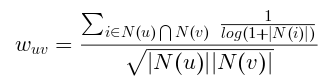

## 载入数据

In [1]:
from RecommendSystemUserIIF.recommend import user_iif
from importlib import reload
from RecommendSystemUserIIF.util import data_reader

## 划分数据集

In [2]:
train_set, test_set = data_reader.split_dataset(data_path=r"./RecommendSystemUserIIF/data/ml-100k/u.data", train_rate=0.8, seed=2024)

## 训练

In [3]:
useriif = user_iif.UserIIF()
useriif.train(origin_data=train_set, sim_matrix_path=r"./RecommendSystemUserIIF/data/user_sim.pkl")

正在初始化原始训练数据...
初始化原始训练数据完毕！


模型开始训练...
载入用户协同矩阵...
载入用户协同矩阵完成！
保存用户协同矩阵...
保存用户协同矩阵完成！
模型训练结束！


## 评估


In [4]:
test = dict()
for user, item, _ in test_set:
    test.setdefault(user, list())
    test[user].append(item)

In [5]:
def train_popularity():
    """计算训练集的流行度"""
    train_popularity = dict()
    for user,item,_ in train:
        train_popularity.setdefault(item,0)
        train_popularity[item] += 1
    return train_popularity

In [6]:
from RecommendSystemUserIIF.util import metric
from RecommendSystemUserIIF.util import data_reader
import pandas as pd

def evaluate(N,K):
    """评价模型
        Args:
            N:　　　　推荐的商品个数
            K:　　　　搜索邻近的用户个数
        Return:
            精确率,召回率,覆盖率,流行度
    """
    recommens = useriif.recommend_users(test.keys(),N = N,K = K)
    all_items = data_reader.all_items()
    item_popularity = train_popularity(trainset)

    recall = metric.recall(recommends = recommens,tests=test)
    precision = metric.precision(recommends = recommens,tests = test)
    coverage = metric.coverage(recommends = recommens,all_items = all_items)
    popularity = metric.popularity(item_popular = item_popularity,recommends = recommens)
    
    return precision,recall,coverage,popularity

In [7]:
N = 30   #表示推荐的商品个数
K_list = [5,10,20,40,80,160]  #表示临近用户的list
evals = list()

for k in K_list:
    single_eval = evaluate(N = N,K = k)
    evals.append(single_eval)

推荐算法运行中...


AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:
pd.DataFrame(
        data = evals,
        index = K_list,
        columns = ["Precision","Recall","Coverage","Popularity"]
)